###**IMPORTACION DE DATOS**



In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


####**Exploración para comprender estructura y contenido del conjunto de datos**

In [18]:
tienda.shape

(2359, 12)

In [19]:
tienda2.shape

(2359, 12)

In [20]:
tienda3.shape

(2359, 12)

In [21]:
tienda4.shape

(2358, 12)

####**Iguales categorías**

In [22]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [23]:
tienda2.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [24]:
tienda3.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [25]:
tienda4.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

####**Observamos las calificaciones de satisfacción: del 1 al 5**

In [26]:
tienda['Calificación'].unique()

array([4, 1, 5, 3, 2])

####**Verificamos la existencia de datos nulos**

In [27]:
tienda.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


#1. Análisis de facturación



####Ingreso de cada tienda

In [28]:
import pandas as pd

tienda_total_precio = tienda['Precio'].sum()
tienda2_total_precio = tienda2['Precio'].sum()
tienda3_total_precio = tienda3['Precio'].sum()
tienda4_total_precio = tienda4['Precio'].sum()

comparacion_precios = pd.Series({
    'Tienda 1': tienda_total_precio,
    'Tienda 2': tienda2_total_precio,
    'Tienda 3': tienda3_total_precio,
    'Tienda 4': tienda4_total_precio
}).sort_values(ascending=False)
pd.options.display.float_format = '{:,.2f}'.format

print("Comparación de Precios Totales por Tienda (de mayor a menor):")
print(comparacion_precios)

Comparación de Precios Totales por Tienda (de mayor a menor):
Tienda 1   1,150,880,400.00
Tienda 2   1,116,343,500.00
Tienda 3   1,098,019,600.00
Tienda 4   1,038,375,700.00
dtype: float64


In [29]:
import matplotlib.pyplot as plt

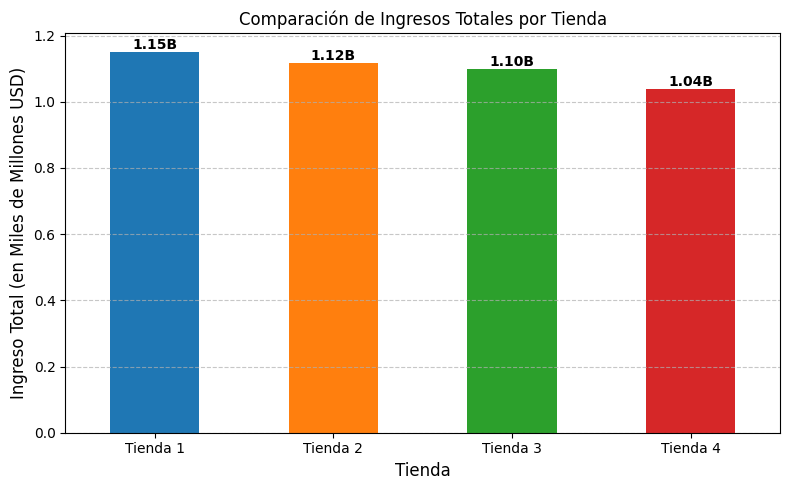

In [30]:
import matplotlib.pyplot as plt

# 1. ESCALAR LOS DATOS A MILES DE MILLONES (Billion)
datos_escalados = comparacion_precios / 1e9
plt.figure(figsize=(8, 5))

# Creación del gráfico de barras con los datos escalados
datos_escalados.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
# Se usan colores diferentes para mayor claridad

# 2. Configuración de Etiquetas Mejorada
plt.title('Comparación de Ingresos Totales por Tienda', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total (en Miles de Millones USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir líneas de cuadrícula para facilitar la lectura

# 3. Mostrar los valores exactos sobre cada barra (usando la escala B)
for i, valor in enumerate(datos_escalados):
    # Formato para que se vea como "1.15B"
    plt.text(i, valor, f'{valor:.2f}B', ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

####Resultado Global

In [31]:
ventas_por_categoria = pd.concat([tienda, tienda2, tienda3, tienda4])
ventas_por_categoria = ventas_por_categoria.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
print("Ventas Totales por Categoría de Producto:")
print(ventas_por_categoria)

Ventas Totales por Categoría de Producto:
Categoría del Producto
Electrónicos              1,660,576,500.00
Electrodomésticos         1,324,751,100.00
Muebles                     757,661,000.00
Instrumentos musicales      348,772,600.00
Deportes y diversión        142,977,700.00
Juguetes                     73,604,400.00
Artículos para el hogar      57,579,800.00
Libros                       37,696,100.00
Name: Precio, dtype: float64


####Resultado Desglosado

In [32]:
ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ventas_por_categoria2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ventas_por_categoria3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ventas_por_categoria4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print("Ventas por Categoría de Producto Tienda 1:")
print(ventas_por_categoria)
print("Ventas por Categoría de Producto Tienda 2:")
print(ventas_por_categoria)
print("Ventas por Categoría de Producto Tienda 3:")
print(ventas_por_categoria)
print("Ventas por Categoría de Producto Tienda 4:")
print(ventas_por_categoria)

Ventas por Categoría de Producto Tienda 1:
Categoría del Producto
Electrónicos              429,493,500.00
Electrodomésticos         363,685,200.00
Muebles                   187,633,700.00
Instrumentos musicales     91,299,000.00
Deportes y diversión       39,290,000.00
Juguetes                   17,995,700.00
Artículos para el hogar    12,698,400.00
Libros                      8,784,900.00
Name: Precio, dtype: float64
Ventas por Categoría de Producto Tienda 2:
Categoría del Producto
Electrónicos              429,493,500.00
Electrodomésticos         363,685,200.00
Muebles                   187,633,700.00
Instrumentos musicales     91,299,000.00
Deportes y diversión       39,290,000.00
Juguetes                   17,995,700.00
Artículos para el hogar    12,698,400.00
Libros                      8,784,900.00
Name: Precio, dtype: float64
Ventas por Categoría de Producto Tienda 3:
Categoría del Producto
Electrónicos              429,493,500.00
Electrodomésticos         363,685,200.00
Mueble

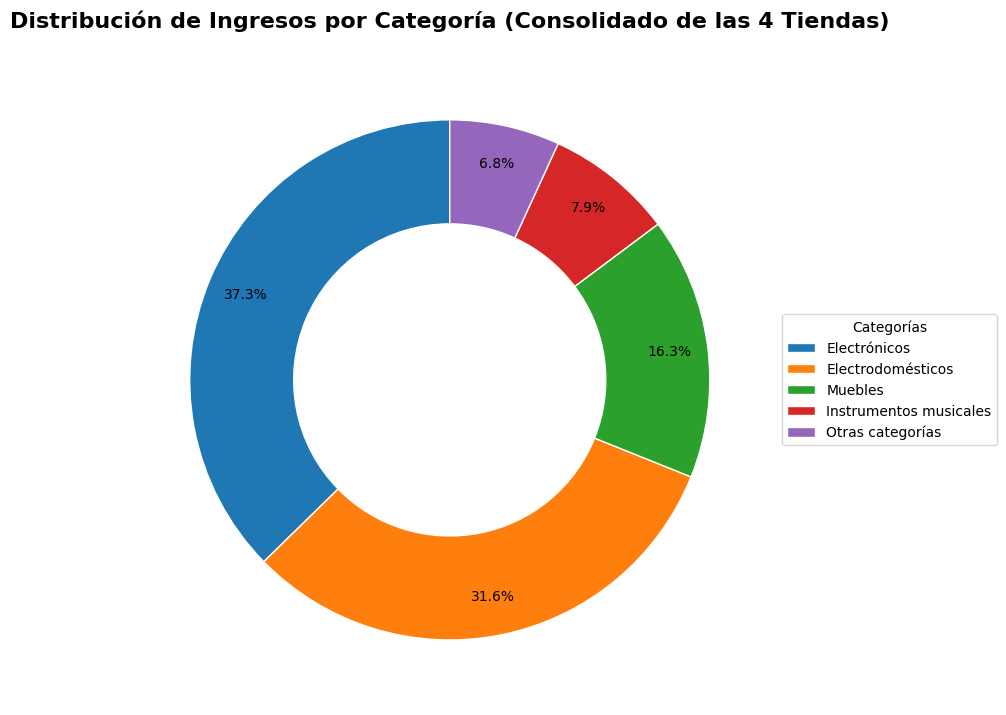

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de la Tienda 1 (que es igual a todas)
data = {
    'Electrónicos': 429493500.00,
    'Electrodomésticos': 363685200.00,
    'Muebles': 187633700.00,
    'Instrumentos musicales': 91299000.00,
    'Deportes y diversión': 39290000.00,
    'Juguetes': 17995700.00,
    'Artículos para el hogar': 12698400.00,
    'Libros': 8784900.00
}
ventas = pd.Series(data)

# Agrupación: Sumar todas las categorías restantes en 'Otras'
otras_ventas = ventas[['Deportes y diversión', 'Juguetes', 'Artículos para el hogar', 'Libros']].sum()

# Serie Final para el gráfico
ventas_final = pd.Series({
    'Electrónicos': ventas['Electrónicos'],
    'Electrodomésticos': ventas['Electrodomésticos'],
    'Muebles': ventas['Muebles'],
    'Instrumentos musicales': ventas['Instrumentos musicales'],
    'Otras categorías': otras_ventas
}).sort_values(ascending=False)

# Crear el gráfico de Dona (Pie Chart con un agujero central)
fig, ax = plt.subplots(figsize=(9, 9))

# Trazar el gráfico de torta (wedgeprops para crear el agujero)
wedges, texts, autotexts = ax.pie(
    ventas_final,
    autopct='%1.1f%%', # Formato de porcentaje
    startangle=90,
    pctdistance=0.85, # Posición del porcentaje
    textprops={'fontsize': 10, 'color': 'black'},
    wedgeprops={'width': 0.4, 'edgecolor': 'white'} # Crea el agujero de la dona
)

# Configuración y Etiquetas
ax.set_title(
    'Distribución de Ingresos por Categoría (Consolidado de las 4 Tiendas)',
    fontsize=16,
    weight='bold',
    pad=20
)
# Leyenda
ax.legend(
    wedges,
    ventas_final.index,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.savefig('distribucion_ventas_dona.png')

# 3. Calificación promedio de tiendas


In [34]:
calificacion_tienda1 = tienda['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio de Tienda 1: {calificacion_tienda1:.2f}")
print(f"Calificación promedio de Tienda 2: {calificacion_tienda2:.2f}")
print(f"Calificación promedio de Tienda 3: {calificacion_tienda3:.2f}")
print(f"Calificación promedio de Tienda 4: {calificacion_tienda4:.2f}")

Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [35]:
ranking = tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
ranking2 = tienda2.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
ranking3 = tienda3.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
ranking4 = tienda4.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

print("--- Productos más vendidos Tienda 1 ---")
# Muestra los 5 productos con mayor ingreso
top_ventas = ranking.head(3)
print(top_ventas)
# Muestra los 5 productos con menor ingreso
print("--- Productos menos vendido Tienda 1 ---")
bottom_ventas = ranking.tail(3)
print(bottom_ventas)


--- Productos más vendidos Tienda 1 ---
Producto
TV LED UHD 4K   142,150,200.00
Refrigerador    112,143,300.00
Iphone 15        97,902,200.00
Name: Precio, dtype: float64
--- Productos menos vendido Tienda 1 ---
Producto
Cubo mágico 8x8      696,900.00
Dinosaurio Rex       688,900.00
Cuerda para saltar   652,800.00
Name: Precio, dtype: float64


# 5. Envío promedio por tienda

In [36]:
promedio_envio_tienda1 = tienda['Costo de envío'].mean()
promedio_envio_tienda2 = tienda2['Costo de envío'].mean()
promedio_envio_tienda3 = tienda3['Costo de envío'].mean()
promedio_envio_tienda4 = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio de Tienda 1: {promedio_envio_tienda1:.2f}")
print(f"Costo de envío promedio de Tienda 2: {promedio_envio_tienda2:.2f}")
print(f"Costo de envío promedio de Tienda 3: {promedio_envio_tienda3:.2f}")
print(f"Costo de envío promedio de Tienda 4: {promedio_envio_tienda4:.2f}")

Costo de envío promedio de Tienda 1: 26018.61
Costo de envío promedio de Tienda 2: 25216.24
Costo de envío promedio de Tienda 3: 24805.68
Costo de envío promedio de Tienda 4: 23459.46


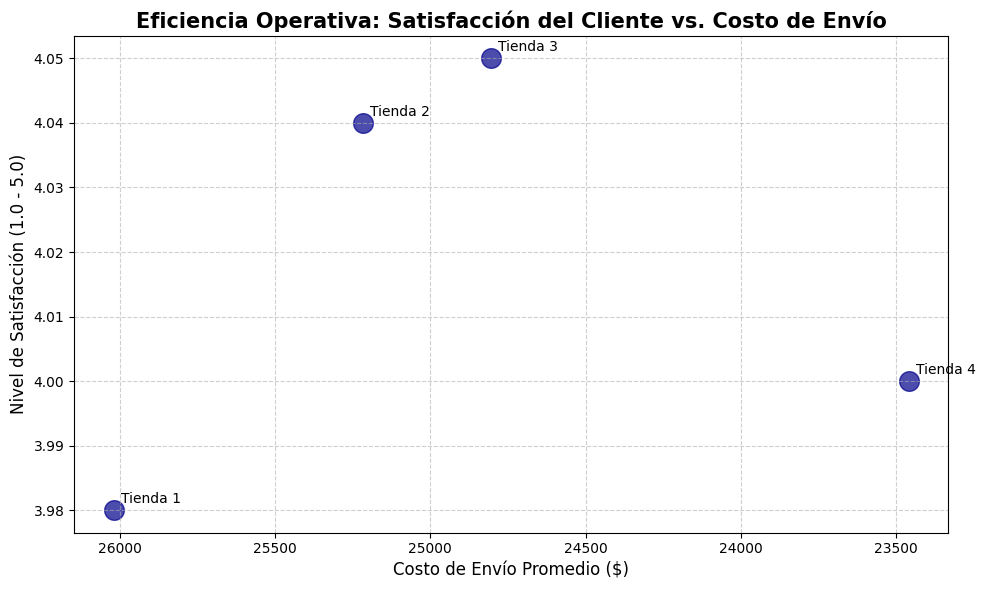

In [37]:
import matplotlib.pyplot as plt
import numpy as np

satisfaccion = np.array([3.98, 4.04, 4.05, 4.00])
costo_envio = np.array([26018.61, 25216.24, 24805.68, 23459.46])
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.figure(figsize=(10, 6))

# 1. Crear el gráfico de dispersión
plt.scatter(costo_envio, satisfaccion, s=200, color='darkblue', alpha=0.7)

# 2. Configuración y Etiquetas
plt.title('Eficiencia Operativa: Satisfacción del Cliente vs. Costo de Envío', fontsize=15, weight='bold')
plt.xlabel('Costo de Envío Promedio ($)', fontsize=12)
plt.ylabel('Nivel de Satisfacción (1.0 - 5.0)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 3. Etiquetar cada punto
for i, txt in enumerate(tiendas):
    plt.annotate(txt, (costo_envio[i], satisfaccion[i]),
                 textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10)

# 4. Invertir el eje X para que el bajo costo esté a la izquierda (Mejor para análisis de eficiencia)
plt.gca().invert_xaxis()

plt.tight_layout()
plt.savefig('satisfaccion_vs_costo_scatter.png')

#**INFORME FINAL - RESUMEN DE RENDIMIENTO**

####**Facturación - Desglose de menor a mayor:**

* Tienda 4: 10383757000
* Tienda 3: 10980196000
* Tienda 2: 11163435000
* Tienda 1: 11508804000  








####**Categorías - Coinciden en las 4 tiendas:**

Mayor ingreso:
Electrónicos
Electrodomésticos
Muebles

Menor ingreso:
Libros
Artículos para el hogar
Juguetes  

####**Ranking de productos:**
Lider en ingresos:  TV LED UHD 4K  
Menor contribución: Cubo mágico 8x8**

###**Nivel de satisfacción (puntuación del 1 al 5)**

*   Tienda 3: 4.05
*   Tienda 2: 4.04
*   Tienda 4: 4.00
*   Tienda 1: 3.98


####**Costo promedio de envío:**


*   Tienda 1: 26 018.61
*   Tienda 2: 25 216.24
*   Tienda 3: 24 805.68
*   Tienda 4: 23 459.46



##**Conclusión:**

Se recomienda no invertir en la tienda 4 ya que tiene la peor combinación de  ingresos y eficiencia operativa.

Menor Rentabilidad: La Tienda 4 es la tienda menos rentable por ingreso, quedando un 10.84% por debajo de la Tienda 1.

Baja Eficiencia: Tiene el costo de envío más bajo $23,459.46, su bajo volumen de ingresos indica que esta eficiencia operativa no se traduce en volumen de ventas, limitando su potencial de crecimiento.

Rendimiento del Cliente: La Tienda 4 tiene un nivel de satisfacción de cliente neutro (4.00), lo que sugiere que su bajo costo operativo no es suficiente para impulsar el desempeño general.